<a href="https://colab.research.google.com/github/Sxhail/Plane-Crash-Prediction/blob/main/Plane_Crash_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Plane Crashes.csv')
df.head()


,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown


In [ ]:
df.describe()

,YOM,Flight no.,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities
count,23225.000000,0.0,28512.000000,28535.000000,28482.000000,28535.000000,28526.000000,28536.000000
mean,1931.942519,NaN,3.052539,1.771649,7.705393,3.679727,0.109760,5.567389
std,285.486067,NaN,11.738151,2.520554,24.066368,15.288171,2.644296,16.713203
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1944.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1958.000000,NaN,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1974.000000,NaN,4.000000,3.000000,4.000000,1.000000,0.000000,5.000000
max,19567.000000,NaN,1924.000000,25.000000,509.000000,506.000000,297.000000,520.000000


In [ ]:
df.columns

Index(['Date', 'Time', 'Aircraft', 'Operator', 'Registration', 'Flight phase',
       'Flight type', 'Survivors', 'Crash site', 'Schedule', 'MSN', 'YOM',
       'Flight no.', 'Crash location', 'Country', 'Region', 'Crew on board',
       'Crew fatalities', 'Pax on board', 'PAX fatalities', 'Other fatalities',
       'Total fatalities', 'Circumstances', 'Crash cause'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28536 entries, 0 to 28535
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              28536 non-null  object 
 1   Time              13949 non-null  object 
 2   Aircraft          28535 non-null  object 
 3   Operator          28536 non-null  object 
 4   Registration      27721 non-null  object 
 5   Flight phase      27898 non-null  object 
 6   Flight type       28479 non-null  object 
 7   Survivors         27239 non-null  object 
 8   Crash site        28153 non-null  object 
 9   Schedule          19590 non-null  object 
 10  MSN               24354 non-null  object 
 11  YOM               23225 non-null  float64
 12  Flight no.        0 non-null      float64
 13  Crash location    28524 non-null  object 
 14  Country           28535 non-null  object 
 15  Region            28535 non-null  object 
 16  Crew on board     28512 non-null  float6

Performing EDA


In [ ]:
df.isnull().sum()

,0
Date,0
Time,14587
Aircraft,1
Operator,0
Registration,815
Flight phase,638
Flight type,57
Survivors,1297
Crash site,383
Schedule,8946


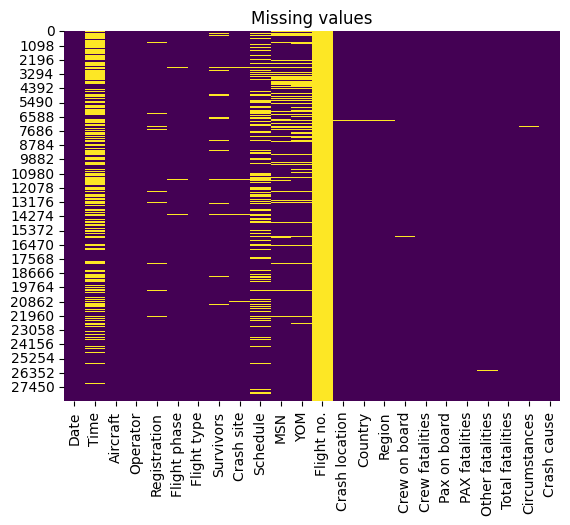

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Missing values')
plt.show()


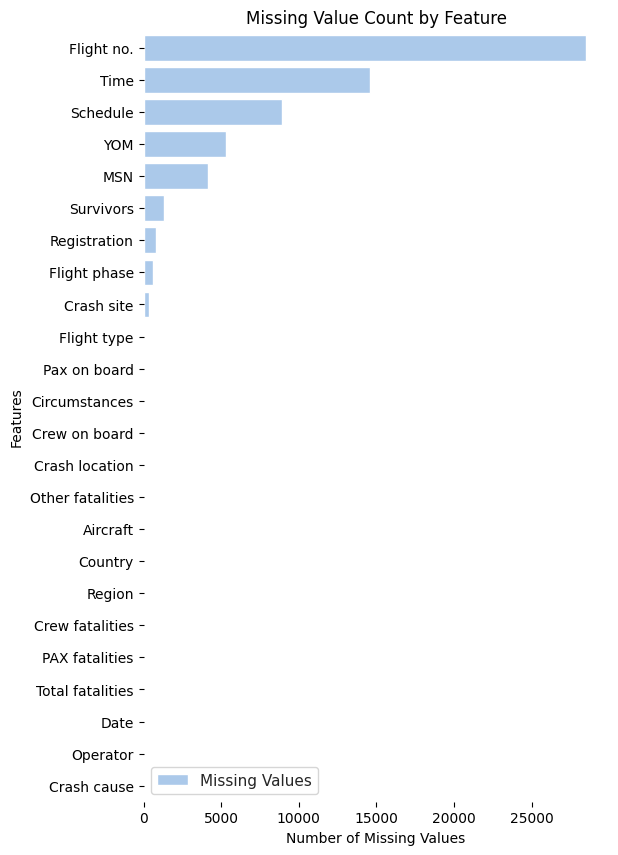

In [ ]:
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Feature', 'Missing Count']
missing_values = missing_values.sort_values('Missing Count', ascending=False)

f, ax = plt.subplots(figsize=(6, 10))

sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x="Missing Count", y="Feature", data=missing_values, label="Missing Values", color="b")

ax.set(xlabel="Number of Missing Values", ylabel="Features",
       title="Missing Value Count by Feature")
sns.despine(left=True, bottom=True)

plt.show()


In [ ]:
df['Circumstances'].value_counts().head(10)

,count
Circumstances,
Crashed in unknown circumstances.,162
Crashed in unknown circumstances. There were no casualties.,62
Crashed in unknown circumstances. Crew fate unknown.,51
Crashed in unknown circumstances. No casualties.,40
Crashed in unknown circumstances. Occupant fate unknown.,30
Crashed in unknown circumstances. Occupant's fate unknown.,19
Crashed on takeoff. Crew fate unknown.,15
Crashed on landing for unknown reason. There were no casualties.,15
Crashed on landing. No casualties.,15


In [ ]:
df = df.drop(df.columns[0], axis=1)
df = df.dropna(subset=['Crash cause'])
df['Crew fatalities'].fillna(df['Crew fatalities'].mean(), inplace=True)
df['PAX fatalities'].fillna(df['PAX fatalities'].mean(), inplace=True)
df['Total fatalities'] = df['Total fatalities'].fillna(df['Crew fatalities'] + df['PAX fatalities'])
df['Aircraft'] = df['Operator']
df['Country'].fillna(df['Country'].mode()[0], inplace=  True)
df['Region'].fillna(df['Region'].mode()[0], inplace = True)
df['Circumstance_Keywords'] = df['Circumstances'].str.extract(r'(takeoff|landing|mechanical failure|weather|fire|engine|collision|error)', expand=False)
df['Circumstances'].fillna("Unknown", inplace=True)
df['Flight phase'].fillna(df['Flight phase'].mode()[0], inplace=True)

df['Flight type'].fillna(df['Flight type'].mode()[0], inplace=True)

df['YOM'].fillna(df['YOM'].mean(), inplace=True)

df['Crew on board'].fillna(df['Crew on board'].mean(), inplace=True)



<ipython-input-12-b528479f9904>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Crew fatalities'].fillna(df['Crew fatalities'].mean(), inplace=True)
<ipython-input-12-b528479f9904>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [ ]:
df.isnull().sum()

,0
Time,14587
Aircraft,0
Operator,0
Registration,815
Flight phase,0
Flight type,0
Survivors,1297
Crash site,383
Schedule,8946
MSN,4182


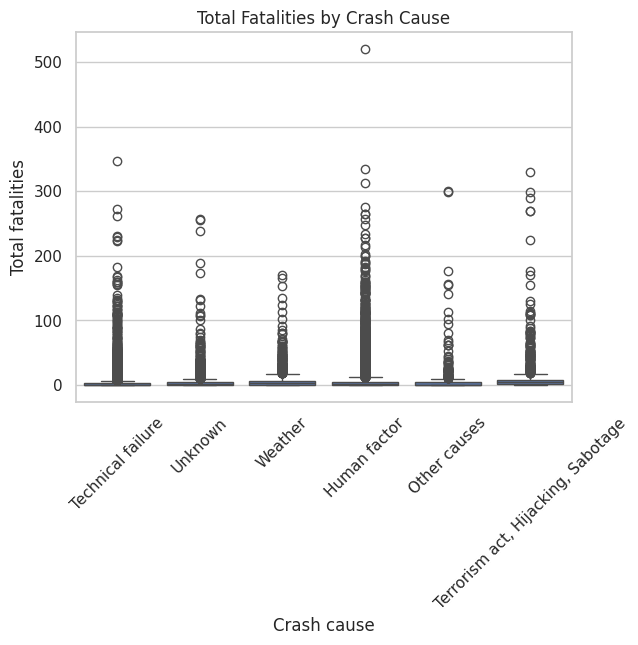

In [ ]:
# @title
sns.boxplot(x='Crash cause', y='Total fatalities', data=df)
plt.xticks(rotation=45)
plt.title("Total Fatalities by Crash Cause")
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

column_to_normalize = ['Crew fatalities', 'PAX fatalities', 'Total fatalities']
scaler = MinMaxScaler()
df[column_to_normalize] = scaler.fit_transform(df[column_to_normalize])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df[['Aircraft', 'Operator', 'Flight phase', 'Flight type', 'YOM',
        'Crew on board', 'Crew fatalities', 'Pax on board', 'PAX fatalities']]
y = df['Crash cause']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


                                    precision    recall  f1-score   support

                      Human factor       0.54      0.75      0.63      2018
                      Other causes       0.05      0.01      0.02       113
                 Technical failure       0.40      0.25      0.31      1260
Terrorism act, Hijacking, Sabotage       0.53      0.46      0.49       244
                           Unknown       0.57      0.56      0.57      1775
                           Weather       0.17      0.06      0.09       298

                          accuracy                           0.52      5708
                         macro avg       0.38      0.35      0.35      5708
                      weighted avg       0.49      0.52      0.49      5708



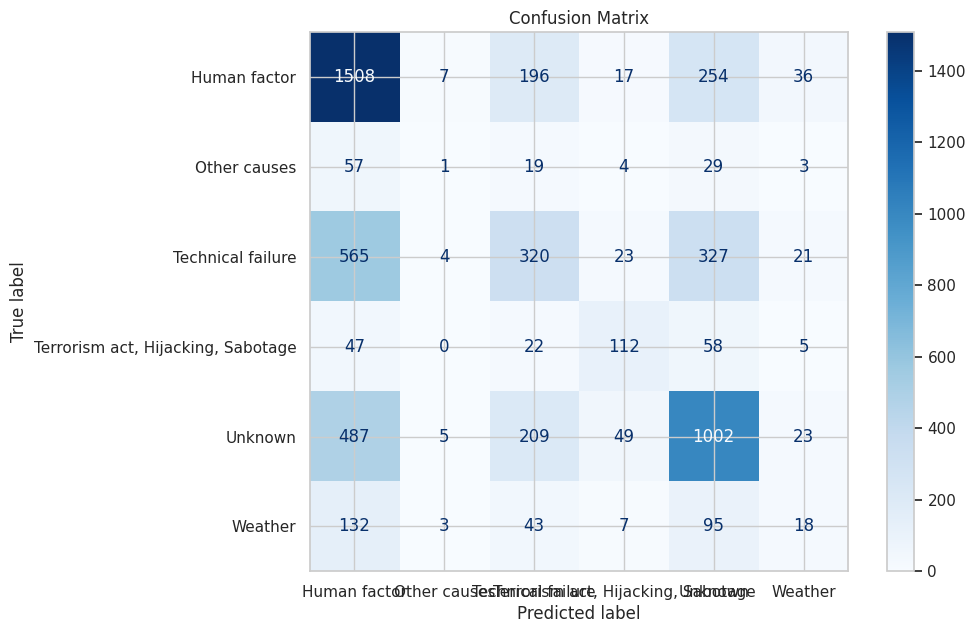

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

fig, ax = plt.subplots(figsize=(10, 7))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()




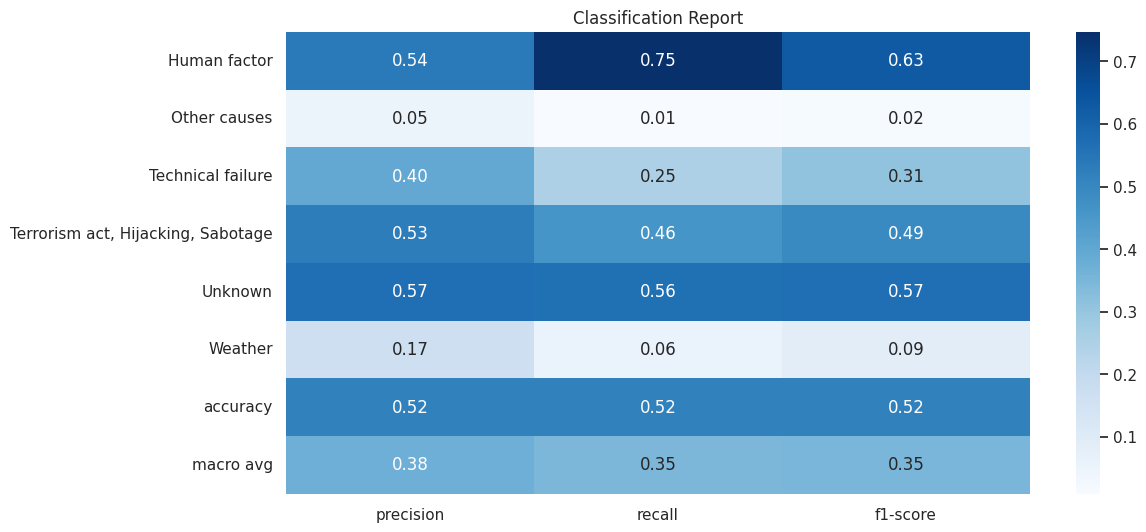

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(12, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")
plt.title("Classification Report")
plt.show()
